<div style="background-color:#9dedde; padding: 15px">
<h2>Projet 7 : Implémentez un modèle de Scoring</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly import tools
import plotly.express as px
from datetime import datetime
import datetime
from sklearn.preprocessing import OneHotEncoder
# pd.set_option('display.max_columns', 200)
# pd.set_option('display.max_rows', 1000)

# **Chargement des données**

In [2]:
df = pd.read_csv("app_train_sample.csv")

In [3]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,196888,0,Cash loans,F,N,Y,0,135000.0,1350000.0,39604.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,101392,0,Cash loans,F,Y,Y,0,81000.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,435135,0,Cash loans,F,N,N,0,112500.0,298512.0,19948.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,396314,0,Cash loans,M,N,N,0,81000.0,218016.0,17352.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
4,341153,1,Cash loans,F,N,Y,0,90000.0,1006920.0,42790.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,311641,0,Cash loans,F,N,N,1,90000.0,808650.0,23773.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
30747,151728,1,Cash loans,M,N,Y,0,40500.0,85500.0,9108.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
30748,384640,0,Revolving loans,F,Y,Y,0,69750.0,247500.0,12375.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
30749,437079,0,Cash loans,F,N,Y,0,36000.0,270000.0,9828.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
df.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [5]:
df['DAYS_EMPLOYED'].unique()

array([ -152,  -717,  -667, ..., -7915, -5598, -7215])

# **Analyse de la forme du dataset**

In [6]:
df.shape

(30751, 122)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30751 entries, 0 to 30750
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 28.6+ MB


In [8]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [9]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [10]:
df.select_dtypes(object).nunique().sort_values(ascending=False)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
WALLSMATERIAL_MODE             7
NAME_INCOME_TYPE               6
NAME_HOUSING_TYPE              6
NAME_FAMILY_STATUS             5
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
FLAG_OWN_REALTY                2
NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
EMERGENCYSTATE_MODE            2
dtype: int64

In [11]:
(df.select_dtypes(object).nunique().sort_values(ascending=False) / len(df)).round(3)

ORGANIZATION_TYPE             0.002
OCCUPATION_TYPE               0.001
NAME_TYPE_SUITE               0.000
WEEKDAY_APPR_PROCESS_START    0.000
WALLSMATERIAL_MODE            0.000
NAME_INCOME_TYPE              0.000
NAME_HOUSING_TYPE             0.000
NAME_FAMILY_STATUS            0.000
NAME_EDUCATION_TYPE           0.000
FONDKAPREMONT_MODE            0.000
HOUSETYPE_MODE                0.000
FLAG_OWN_REALTY               0.000
NAME_CONTRACT_TYPE            0.000
CODE_GENDER                   0.000
FLAG_OWN_CAR                  0.000
EMERGENCYSTATE_MODE           0.000
dtype: float64

# **NaN & Duplicated**

In [12]:
df.duplicated().sum()

np.int64(0)

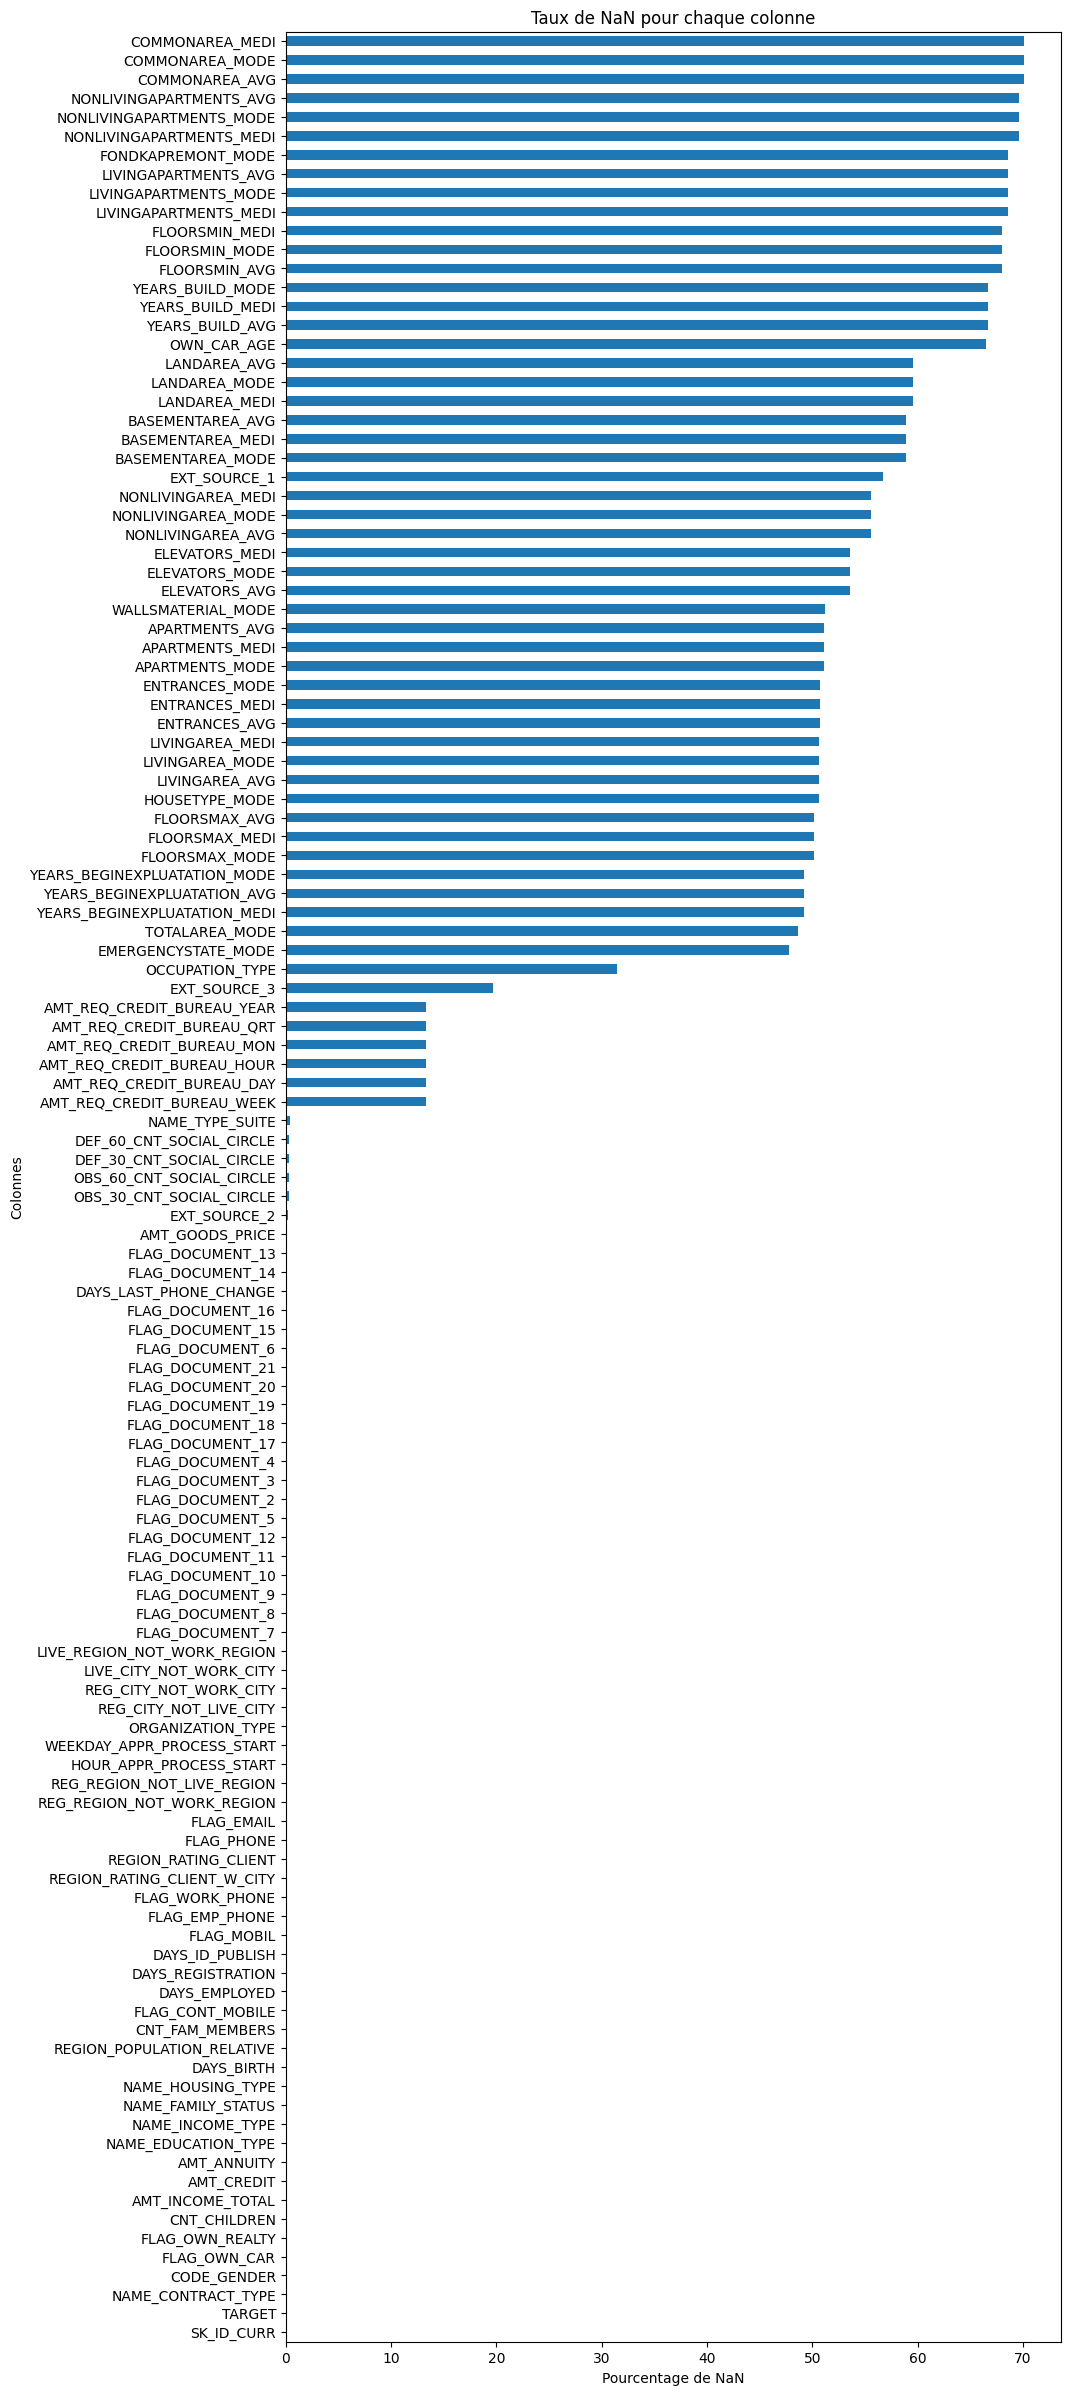

In [13]:
# Calculer les taux de NaN pour chaque colonne
nan_counts = df.isna().sum() / len(df) * 100

# Créer un graphique à barres horizontales pour visualiser les taux de NaN
plt.figure(figsize=(10, 30))
nan_counts.sort_values().plot(kind="barh")
plt.title("Taux de NaN pour chaque colonne")
plt.xlabel("Pourcentage de NaN")
plt.ylabel("Colonnes")
plt.show()

In [14]:
# Calculer les taux de NaN pour chaque colonne
nan_counts = df.isna().sum() / len(df) * 100

# Créer une dataframe triée par ordre décroissant des taux de NaN
sorted_nan_counts = nan_counts.sort_values(ascending=False).reset_index()
sorted_nan_counts.columns = ["Colonnes", "Taux_NaN"]


# Créer une coloration (cmap) pour la dataframe
cmap = plt.get_cmap("Reds")
sorted_nan_counts.style.background_gradient(cmap="Reds", subset=["Taux_NaN"])

,Colonnes,Taux_NaN
0,COMMONAREA_AVG,70.079022
1,COMMONAREA_MODE,70.079022
2,COMMONAREA_MEDI,70.079022
3,NONLIVINGAPARTMENTS_MEDI,69.659523
4,NONLIVINGAPARTMENTS_MODE,69.659523
5,NONLIVINGAPARTMENTS_AVG,69.659523
6,FONDKAPREMONT_MODE,68.615655
7,LIVINGAPARTMENTS_AVG,68.553868
8,LIVINGAPARTMENTS_MEDI,68.553868
9,LIVINGAPARTMENTS_MODE,68.553868


In [15]:
# Calculer les taux de NaN pour chaque colonne
nan_percentages = df.isna().mean() * 100

# Identifier les colonnes avec plus de 60% de NaN
cols_to_drop = nan_percentages[nan_percentages > 60].index

# Supprimer les colonnes identifiées
df = df.drop(cols_to_drop, axis=1)

In [16]:
# Calculer les taux de NaN pour chaque colonne
nan_counts = df.isna().sum() / len(df) * 100

# Créer une dataframe triée par ordre décroissant des taux de NaN
sorted_nan_counts = nan_counts.sort_values(ascending=False).reset_index()
sorted_nan_counts.columns = ["Colonnes", "Taux_NaN"]


# Créer une coloration (cmap) pour la dataframe
cmap = plt.get_cmap("Greens")
sorted_nan_counts.style.background_gradient(cmap="Greens", subset=["Taux_NaN"])

,Colonnes,Taux_NaN
0,LANDAREA_AVG,59.565543
1,LANDAREA_MODE,59.565543
2,LANDAREA_MEDI,59.565543
3,BASEMENTAREA_AVG,58.889142
4,BASEMENTAREA_MODE,58.889142
5,BASEMENTAREA_MEDI,58.889142
6,EXT_SOURCE_1,56.742870
7,NONLIVINGAREA_AVG,55.568925
8,NONLIVINGAREA_MODE,55.568925
9,NONLIVINGAREA_MEDI,55.568925


In [17]:
df.duplicated(subset="SK_ID_CURR").sum()

np.int64(0)

# **Data Analyse**

In [18]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,30751.000000,30751.000000,30751.000000,3.075100e+04,3.075100e+04,30751.000000,3.072700e+04,30751.000000,30751.000000,30751.000000,...,30751.000000,30751.000000,30751.000000,30751.000000,26655.000000,26655.000000,26655.000000,26655.000000,26655.000000,26655.000000
mean,277502.048876,0.080355,0.416214,1.725484e+05,5.976381e+05,27141.339013,5.371948e+05,0.020861,-16040.187571,64634.946408,...,0.008195,0.000358,0.000293,0.000325,0.005815,0.008216,0.034065,0.263853,0.262953,1.895854
std,102861.310895,0.271847,0.723943,6.809442e+05,3.998446e+05,14405.483705,3.672385e+05,0.013822,4382.669307,141941.330696,...,0.090155,0.018910,0.017105,0.018030,0.079886,0.125409,0.201952,0.912617,0.611597,1.872551
min,100011.000000,0.000000,0.000000,2.655000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25201.000000,-16678.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188725.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16616.250000,2.385000e+05,0.010006,-19718.500000,-2747.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277017.000000,0.000000,0.000000,1.440000e+05,5.135310e+05,24939.000000,4.500000e+05,0.018850,-15739.000000,-1207.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,366185.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34600.500000,6.795000e+05,0.028663,-12430.000000,-283.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456240.000000,1.000000,12.000000,1.170000e+08,4.050000e+06,225000.000000,4.050000e+06,0.072508,-7676.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,9.000000,8.000000,27.000000,7.000000,19.000000


In [19]:
df.describe(include=object)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,30751,30751,30751,30751,30627,30751,30751,30751,30751,21087,30751,30751,15195,15001,16051
unique,2,2,2,2,7,6,5,5,6,18,7,58,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,block of flats,Panel,No
freq,27860,20198,20432,21298,24786,15960,21738,19751,27222,5565,5242,6800,14938,6666,15843


# **SELECTION DES COLONNES**

In [20]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,196888,0,Cash loans,F,N,Y,0,135000.0,1350000.0,39604.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,101392,0,Cash loans,F,Y,Y,0,81000.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,435135,0,Cash loans,F,N,N,0,112500.0,298512.0,19948.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,396314,0,Cash loans,M,N,N,0,81000.0,218016.0,17352.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
4,341153,1,Cash loans,F,N,Y,0,90000.0,1006920.0,42790.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,311641,0,Cash loans,F,N,N,1,90000.0,808650.0,23773.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
30747,151728,1,Cash loans,M,N,Y,0,40500.0,85500.0,9108.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
30748,384640,0,Revolving loans,F,Y,Y,0,69750.0,247500.0,12375.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
30749,437079,0,Cash loans,F,N,Y,0,36000.0,270000.0,9828.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
df['DAYS_EMPLOYED'].unique()

array([ -152,  -717,  -667, ..., -7915, -5598, -7215])

In [22]:
df['DAYS_EMPLOYED'].min()

np.int64(-16678)

In [23]:
df['DAYS_EMPLOYED'].max()

np.int64(365243)

In [24]:
df[df['DAYS_EMPLOYED']==365243]



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12,439852,0,Revolving loans,M,Y,Y,0,112500.0,337500.0,16875.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
15,308021,0,Cash loans,F,N,Y,0,40500.0,364896.0,18760.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
22,181619,0,Cash loans,M,N,N,0,135000.0,180000.0,16785.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
23,436648,0,Cash loans,F,N,Y,0,135000.0,363190.5,28822.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
24,197628,0,Cash loans,F,N,Y,0,90000.0,251091.0,27171.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30729,164235,0,Cash loans,F,N,Y,0,90000.0,317979.0,13599.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0
30743,150906,0,Cash loans,F,N,Y,0,103500.0,121500.0,9211.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
30745,383550,0,Cash loans,M,N,Y,0,405000.0,1006920.0,48573.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
30748,384640,0,Revolving loans,F,Y,Y,0,69750.0,247500.0,12375.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
# Liste des noms de colonnes
columns = {
    # Informations générales sur les clients :
    "SK_ID_CURR": "ID_CLIENT",
    "TARGET": "CIBLE",
    "NAME_CONTRACT_TYPE": "TYPE_CONTRAT",
    # Informations personnelles sur le client :
    "CODE_GENDER": "GENRE",
    "FLAG_OWN_CAR": "PROPRIETAIRE_VOITURE",
    "FLAG_OWN_REALTY": "PROPRIETAIRE_BIEN_IMMO",
    "CNT_CHILDREN": "NBR_ENFANTS",
    "AMT_INCOME_TOTAL": "REVENU_TOTAL",
    "NAME_TYPE_SUITE": "NOM_TYPE_SUITE",
    "NAME_INCOME_TYPE": "TYPE_REVENUS",
    "NAME_EDUCATION_TYPE": "NIVEAU_EDUCATION",
    "NAME_FAMILY_STATUS": "STATUT_FAMILIAL",
    "NAME_HOUSING_TYPE": "TYPE_LOGEMENT",
    # Informations démographiques et régionales :
    "REGION_POPULATION_RELATIVE": "POPULATION_REGION",
    "REG_REGION_NOT_LIVE_REGION": "REG_NON_RESIDENCE_REGION",
    "REG_REGION_NOT_WORK_REGION": "REG_NON_REGION_TRAVAIL",
    "LIVE_REGION_NOT_WORK_REGION": "RESIDENCE_NON_TRAVAIL_REGION",
    "REG_CITY_NOT_LIVE_CITY": "REG_NON_RESIDENCE_VILLE",
    "REG_CITY_NOT_WORK_CITY": "REG_NON_TRAVAIL_VILLE",
    "LIVE_CITY_NOT_WORK_CITY": "RESIDENCE_NON_TRAVAIL_VILLE",
    # Informations temporelles :
    "DAYS_BIRTH": "JOURS_NAISSANCE",
    "DAYS_EMPLOYED": "JOURS_EMPLOI",
    "DAYS_REGISTRATION": "JOURS_ENREGISTREMENT",
    "DAYS_ID_PUBLISH": "JOURS_ID_PUBLICATION",
    "WEEKDAY_APPR_PROCESS_START": "JOUR_PROCESSUS_DEBUT",
    "HOUR_APPR_PROCESS_START": "HEURE_PROCESSUS_DEBUT",
    "DAYS_LAST_PHONE_CHANGE": "JOURS_DERNIER_CHANGEMENT_TELEPHONE",
    # Informations sur l'organisation du client :
    "ORGANIZATION_TYPE": "TYPE_ORGANISATION",
    # Informations provenant de sources externes :
    "EXT_SOURCE_1": "SOURCE_EXTERNE_1",
    "EXT_SOURCE_2": "SOURCE_EXTERNE_2",
    "EXT_SOURCE_3": "SOURCE_EXTERNE_3",
    # Informations sur les biens immobiliers du client :
    "AMT_CREDIT": "TOTAL_CREDIT",
    "AMT_ANNUITY": "REMB_MENSUEL",
    "AMT_GOODS_PRICE": "MONTANT_PRIX_BIENS",
    "APARTMENTS_AVG": "APPARTEMENTS_MOYENNE",
    "BASEMENTAREA_AVG": "SUPERFICIE_SOUTERRAINE_MOYENNE",
    "YEARS_BEGINEXPLUATATION_AVG": "DEBUT_EXPLOITATION_MOYENNE",
    "ELEVATORS_AVG": "ASCENSEURS_MOYENNE",
    "ENTRANCES_AVG": "ENTREES_MOYENNE",
    "FLOORSMAX_AVG": "ETAGES_MAX_MOYENNE",
    "LANDAREA_AVG": "SUPERFICIE_TERRAIN_MOYENNE",
    "LIVINGAREA_AVG": "SUPERFICIE_HABITABLE_MOYENNE",
    "NONLIVINGAREA_AVG": "SUPERFICIE_NON_HABITABLE_MOYENNE",
    "APARTMENTS_MODE": "APPARTEMENTS_MODE",
    "BASEMENTAREA_MODE": "SUPERFICIE_SOUTERRAINE_MODE",
    "YEARS_BEGINEXPLUATATION_MODE": "DEBUT_EXPLOITATION_MODE",
    "ELEVATORS_MODE": "ASCENSEURS_MODE",
    "ENTRANCES_MODE": "ENTREES_MODE",
    "FLOORSMAX_MODE": "ETAGES_MAX_MODE",
    "LANDAREA_MODE": "SUPERFICIE_TERRAIN_MODE",
    "LIVINGAREA_MODE": "SUPERFICIE_HABITABLE_MODE",
    "NONLIVINGAREA_MODE": "SUPERFICIE_NON_HABITABLE_MODE",
    "APARTMENTS_MEDI": "APPARTEMENTS_MEDIANE",
    "BASEMENTAREA_MEDI": "SUPERFICIE_SOUTERRAINE_MEDIANE",
    "YEARS_BEGINEXPLUATATION_MEDI": "DEBUT_EXPLOITATION_MEDIANE",
    "ELEVATORS_MEDI": "ASCENSEURS_MEDIANE",
    "ENTRANCES_MEDI": "ENTREES_MEDIANE",
    "FLOORSMAX_MEDI": "ETAGES_MAX_MEDIANE",
    "LANDAREA_MEDI": "SUPERFICIE_TERRAIN_MEDIANE",
    "LIVINGAREA_MEDI": "SUPERFICIE_HABITABLE_MEDIANE",
    "NONLIVINGAREA_MEDI": "SUPERFICIE_NON_HABITABLE_MEDIANE",
    "HOUSETYPE_MODE": "MODELE_TYPE_LOGEMENT",
    "TOTALAREA_MODE": "SUPERFICIE_TOTALE_MODE",
    "WALLSMATERIAL_MODE": "MODELE_MATERIAUX_MURS",
    "EMERGENCYSTATE_MODE": "MODE_URGENCE",
    # Informations sociales du client :
    "OBS_30_CNT_SOCIAL_CIRCLE": "OBS_30_CNT_CERCLE_SOCIAL",
    "DEF_30_CNT_SOCIAL_CIRCLE": "DEF_30_CNT_CERCLE_SOCIAL",
    "OBS_60_CNT_SOCIAL_CIRCLE": "OBS_60_CNT_CERCLE_SOCIAL",
    "DEF_60_CNT_SOCIAL_CIRCLE": "DEF_60_CNT_CERCLE_SOCIAL",
    # Informations sur les documents du client :
    "FLAG_MOBIL": "FLAG_MOBILE",
    "FLAG_EMP_PHONE": "FLAG_TELEPHONE_EMPLOYE",
    "FLAG_WORK_PHONE": "FLAG_TELEPHONE_TRAVAIL",
    "FLAG_CONT_MOBILE": "FLAG_TELEPHONE_MOBILE",
    "FLAG_PHONE": "FLAG_TELEPHONE",
    "FLAG_EMAIL": "FLAG_EMAIL",
    "FLAG_DOCUMENT_2": "FLAG_DOCUMENT_2",
    "FLAG_DOCUMENT_3": "FLAG_DOCUMENT_3",
    "FLAG_DOCUMENT_4": "FLAG_DOCUMENT_4",
    "FLAG_DOCUMENT_5": "FLAG_DOCUMENT_5",
    "FLAG_DOCUMENT_6": "FLAG_DOCUMENT_6",
    "FLAG_DOCUMENT_7": "FLAG_DOCUMENT_7",
    "FLAG_DOCUMENT_8": "FLAG_DOCUMENT_8",
    "FLAG_DOCUMENT_9": "FLAG_DOCUMENT_9",
    "FLAG_DOCUMENT_10": "FLAG_DOCUMENT_10",
    "FLAG_DOCUMENT_11": "FLAG_DOCUMENT_11",
    "FLAG_DOCUMENT_12": "FLAG_DOCUMENT_12",
    "FLAG_DOCUMENT_13": "FLAG_DOCUMENT_13",
    "FLAG_DOCUMENT_14": "FLAG_DOCUMENT_14",
    "FLAG_DOCUMENT_15": "FLAG_DOCUMENT_15",
    "FLAG_DOCUMENT_16": "FLAG_DOCUMENT_16",
    "FLAG_DOCUMENT_17": "FLAG_DOCUMENT_17",
    "FLAG_DOCUMENT_18": "FLAG_DOCUMENT_18",
    "FLAG_DOCUMENT_19": "FLAG_DOCUMENT_19",
    "FLAG_DOCUMENT_20": "FLAG_DOCUMENT_20",
    "FLAG_DOCUMENT_21": "FLAG_DOCUMENT_21",
    # Informations sur les demandes de crédit au bureau de crédit du client :
    "AMT_REQ_CREDIT_BUREAU_HOUR": "NBR_DEMANDES_CREDIT_BUREAU_HEURE",
    "AMT_REQ_CREDIT_BUREAU_DAY": "NBR_DEMANDES_CREDIT_BUREAU_JOUR",
    "AMT_REQ_CREDIT_BUREAU_WEEK": "NBR_DEMANDES_CREDIT_BUREAU_SEMAINE",
    "AMT_REQ_CREDIT_BUREAU_MON": "NBR_DEMANDES_CREDIT_BUREAU_MOIS",
    "AMT_REQ_CREDIT_BUREAU_QRT": "NBR_DEMANDES_CREDIT_BUREAU_TRIMESTRE",
    "AMT_REQ_CREDIT_BUREAU_YEAR": "NBR_DEMANDES_CREDIT_BUREAU_ANNEE",
}

In [26]:
df.rename(columns=columns, inplace=True)

In [27]:
df

,ID_CLIENT,CIBLE,TYPE_CONTRAT,GENRE,PROPRIETAIRE_VOITURE,PROPRIETAIRE_BIEN_IMMO,NBR_ENFANTS,REVENU_TOTAL,TOTAL_CREDIT,REMB_MENSUEL,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,NBR_DEMANDES_CREDIT_BUREAU_HEURE,NBR_DEMANDES_CREDIT_BUREAU_JOUR,NBR_DEMANDES_CREDIT_BUREAU_SEMAINE,NBR_DEMANDES_CREDIT_BUREAU_MOIS,NBR_DEMANDES_CREDIT_BUREAU_TRIMESTRE,NBR_DEMANDES_CREDIT_BUREAU_ANNEE
0,196888,0,Cash loans,F,N,Y,0,135000.0,1350000.0,39604.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,101392,0,Cash loans,F,Y,Y,0,81000.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,435135,0,Cash loans,F,N,N,0,112500.0,298512.0,19948.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,396314,0,Cash loans,M,N,N,0,81000.0,218016.0,17352.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
4,341153,1,Cash loans,F,N,Y,0,90000.0,1006920.0,42790.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,311641,0,Cash loans,F,N,N,1,90000.0,808650.0,23773.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
30747,151728,1,Cash loans,M,N,Y,0,40500.0,85500.0,9108.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
30748,384640,0,Revolving loans,F,Y,Y,0,69750.0,247500.0,12375.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
30749,437079,0,Cash loans,F,N,Y,0,36000.0,270000.0,9828.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
# Calculer les taux de NaN pour chaque colonne
nan_counts = df.isna().sum() / len(df) * 100

# Créer une dataframe triée par ordre décroissant des taux de NaN
sorted_nan_counts = nan_counts.sort_values(ascending=False).reset_index()
sorted_nan_counts.columns = ["Colonnes", "Taux_NaN"]


# Créer une coloration (cmap) pour la dataframe
cmap = plt.get_cmap("Greens")
sorted_nan_counts.style.background_gradient(cmap="Oranges", subset=["Taux_NaN"])

,Colonnes,Taux_NaN
0,SUPERFICIE_TERRAIN_MOYENNE,59.565543
1,SUPERFICIE_TERRAIN_MODE,59.565543
2,SUPERFICIE_TERRAIN_MEDIANE,59.565543
3,SUPERFICIE_SOUTERRAINE_MOYENNE,58.889142
4,SUPERFICIE_SOUTERRAINE_MODE,58.889142
5,SUPERFICIE_SOUTERRAINE_MEDIANE,58.889142
6,SOURCE_EXTERNE_1,56.742870
7,SUPERFICIE_NON_HABITABLE_MOYENNE,55.568925
8,SUPERFICIE_NON_HABITABLE_MODE,55.568925
9,SUPERFICIE_NON_HABITABLE_MEDIANE,55.568925


In [29]:
# Calculer les taux de NaN pour chaque colonne
nan_percentages = df.isna().mean() * 100

# Identifier les colonnes avec plus de 60% de NaN
cols_to_drop = nan_percentages[nan_percentages > 30].index

# Supprimer les colonnes identifiées
df = df.drop(cols_to_drop, axis=1)

In [30]:
df

,ID_CLIENT,CIBLE,TYPE_CONTRAT,GENRE,PROPRIETAIRE_VOITURE,PROPRIETAIRE_BIEN_IMMO,NBR_ENFANTS,REVENU_TOTAL,TOTAL_CREDIT,REMB_MENSUEL,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,NBR_DEMANDES_CREDIT_BUREAU_HEURE,NBR_DEMANDES_CREDIT_BUREAU_JOUR,NBR_DEMANDES_CREDIT_BUREAU_SEMAINE,NBR_DEMANDES_CREDIT_BUREAU_MOIS,NBR_DEMANDES_CREDIT_BUREAU_TRIMESTRE,NBR_DEMANDES_CREDIT_BUREAU_ANNEE
0,196888,0,Cash loans,F,N,Y,0,135000.0,1350000.0,39604.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,101392,0,Cash loans,F,Y,Y,0,81000.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,435135,0,Cash loans,F,N,N,0,112500.0,298512.0,19948.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,396314,0,Cash loans,M,N,N,0,81000.0,218016.0,17352.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
4,341153,1,Cash loans,F,N,Y,0,90000.0,1006920.0,42790.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,311641,0,Cash loans,F,N,N,1,90000.0,808650.0,23773.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
30747,151728,1,Cash loans,M,N,Y,0,40500.0,85500.0,9108.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
30748,384640,0,Revolving loans,F,Y,Y,0,69750.0,247500.0,12375.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
30749,437079,0,Cash loans,F,N,Y,0,36000.0,270000.0,9828.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
df.columns.tolist()

['ID_CLIENT',
 'CIBLE',
 'TYPE_CONTRAT',
 'GENRE',
 'PROPRIETAIRE_VOITURE',
 'PROPRIETAIRE_BIEN_IMMO',
 'NBR_ENFANTS',
 'REVENU_TOTAL',
 'TOTAL_CREDIT',
 'REMB_MENSUEL',
 'MONTANT_PRIX_BIENS',
 'NOM_TYPE_SUITE',
 'TYPE_REVENUS',
 'NIVEAU_EDUCATION',
 'STATUT_FAMILIAL',
 'TYPE_LOGEMENT',
 'POPULATION_REGION',
 'JOURS_NAISSANCE',
 'JOURS_EMPLOI',
 'JOURS_ENREGISTREMENT',
 'JOURS_ID_PUBLICATION',
 'FLAG_MOBILE',
 'FLAG_TELEPHONE_EMPLOYE',
 'FLAG_TELEPHONE_TRAVAIL',
 'FLAG_TELEPHONE_MOBILE',
 'FLAG_TELEPHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'JOUR_PROCESSUS_DEBUT',
 'HEURE_PROCESSUS_DEBUT',
 'REG_NON_RESIDENCE_REGION',
 'REG_NON_REGION_TRAVAIL',
 'RESIDENCE_NON_TRAVAIL_REGION',
 'REG_NON_RESIDENCE_VILLE',
 'REG_NON_TRAVAIL_VILLE',
 'RESIDENCE_NON_TRAVAIL_VILLE',
 'TYPE_ORGANISATION',
 'SOURCE_EXTERNE_2',
 'SOURCE_EXTERNE_3',
 'OBS_30_CNT_CERCLE_SOCIAL',
 'DEF_30_CNT_CERCLE_SOCIAL',
 'OBS_60_CNT_CERCLE_SOCIAL',
 'DEF_60_CNT_CERCLE

In [32]:
col = [
    "ID_CLIENT",
    "CIBLE",
    "TYPE_CONTRAT",
    "GENRE",
    "PROPRIETAIRE_VOITURE",
    "PROPRIETAIRE_BIEN_IMMO",
    "NBR_ENFANTS",
    "REVENU_TOTAL",
    "TOTAL_CREDIT",
    "REMB_MENSUEL",
    "MONTANT_PRIX_BIENS",
    "NOM_TYPE_SUITE",
    "TYPE_REVENUS",
    "NIVEAU_EDUCATION",
    "STATUT_FAMILIAL",
    "TYPE_LOGEMENT",
    "POPULATION_REGION",
    "JOURS_NAISSANCE",
    "JOURS_EMPLOI",
    "JOURS_ENREGISTREMENT",
    "JOURS_ID_PUBLICATION",
    "FLAG_MOBILE",
    #'FLAG_TELEPHONE_EMPLOYE',
    #'FLAG_TELEPHONE_TRAVAIL',
    "FLAG_TELEPHONE_MOBILE",
    #'FLAG_TELEPHONE',
    "FLAG_EMAIL",
    "CNT_FAM_MEMBERS",
    "REGION_RATING_CLIENT",
    "REGION_RATING_CLIENT_W_CITY",
    "JOUR_PROCESSUS_DEBUT",
    "HEURE_PROCESSUS_DEBUT",
    "REG_NON_RESIDENCE_REGION",
    "REG_NON_REGION_TRAVAIL",
    "RESIDENCE_NON_TRAVAIL_REGION",
    "REG_NON_RESIDENCE_VILLE",
    "REG_NON_TRAVAIL_VILLE",
    "RESIDENCE_NON_TRAVAIL_VILLE",
    "TYPE_ORGANISATION",
    "SOURCE_EXTERNE_2",
    "SOURCE_EXTERNE_3",
    #'OBS_30_CNT_CERCLE_SOCIAL',
    #'DEF_30_CNT_CERCLE_SOCIAL',
    #'OBS_60_CNT_CERCLE_SOCIAL',
    #'DEF_60_CNT_CERCLE_SOCIAL',
    #'JOURS_DERNIER_CHANGEMENT_TELEPHONE',
    #"FLAG_DOCUMENT_2",
    "FLAG_DOCUMENT_3",
    #"FLAG_DOCUMENT_4",
    # 'FLAG_DOCUMENT_5',
     'FLAG_DOCUMENT_6',
    # 'FLAG_DOCUMENT_7',
     'FLAG_DOCUMENT_8',
    # 'FLAG_DOCUMENT_9',
    # 'FLAG_DOCUMENT_10',
    # 'FLAG_DOCUMENT_11',
    # 'FLAG_DOCUMENT_12',
    # 'FLAG_DOCUMENT_13',
    # 'FLAG_DOCUMENT_14',
    # 'FLAG_DOCUMENT_15',
    # 'FLAG_DOCUMENT_16',
    # 'FLAG_DOCUMENT_17',
    # 'FLAG_DOCUMENT_18',
    # 'FLAG_DOCUMENT_19',
    # 'FLAG_DOCUMENT_20',
    # 'FLAG_DOCUMENT_21',
    #'NBR_DEMANDES_CREDIT_BUREAU_HEURE',
    #'NBR_DEMANDES_CREDIT_BUREAU_JOUR',
    #'NBR_DEMANDES_CREDIT_BUREAU_SEMAINE',
    #'NBR_DEMANDES_CREDIT_BUREAU_MOIS',
    #'NBR_DEMANDES_CREDIT_BUREAU_TRIMESTRE',
    "NBR_DEMANDES_CREDIT_BUREAU_ANNEE",
]

In [33]:
df = df.loc[:, col]

In [34]:
df.shape

(30751, 42)

#### **Création colonnes**

In [35]:
df.columns

Index(['ID_CLIENT', 'CIBLE', 'TYPE_CONTRAT', 'GENRE', 'PROPRIETAIRE_VOITURE',
       'PROPRIETAIRE_BIEN_IMMO', 'NBR_ENFANTS', 'REVENU_TOTAL', 'TOTAL_CREDIT',
       'REMB_MENSUEL', 'MONTANT_PRIX_BIENS', 'NOM_TYPE_SUITE', 'TYPE_REVENUS',
       'NIVEAU_EDUCATION', 'STATUT_FAMILIAL', 'TYPE_LOGEMENT',
       'POPULATION_REGION', 'JOURS_NAISSANCE', 'JOURS_EMPLOI',
       'JOURS_ENREGISTREMENT', 'JOURS_ID_PUBLICATION', 'FLAG_MOBILE',
       'FLAG_TELEPHONE_MOBILE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'JOUR_PROCESSUS_DEBUT', 'HEURE_PROCESSUS_DEBUT',
       'REG_NON_RESIDENCE_REGION', 'REG_NON_REGION_TRAVAIL',
       'RESIDENCE_NON_TRAVAIL_REGION', 'REG_NON_RESIDENCE_VILLE',
       'REG_NON_TRAVAIL_VILLE', 'RESIDENCE_NON_TRAVAIL_VILLE',
       'TYPE_ORGANISATION', 'SOURCE_EXTERNE_2', 'SOURCE_EXTERNE_3',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8',
       'NBR_DEMANDES_CREDIT_BUREAU_ANNEE'],
      dtype='objec

**Date de naissance**

In [36]:
df.JOURS_NAISSANCE

0       -17481
1       -19831
2        -9203
3       -10709
4       -16076
         ...  
30746   -15067
30747   -13811
30748   -15843
30749   -21992
30750   -21386
Name: JOURS_NAISSANCE, Length: 30751, dtype: int64

In [37]:
# Convertir en dates de naissance
df["DATE_NAISSANCE"] = pd.to_datetime("today") + pd.to_timedelta(
    df["JOURS_NAISSANCE"], unit="D"
)


# Supprimer l'heure de la date
df["DATE_NAISSANCE"] = df["DATE_NAISSANCE"].dt.floor("D")

# Changer le format de la date en "jour/mois/année" (format français)
df["DATE_NAISSANCE"] = df["DATE_NAISSANCE"].dt.strftime("%d/%m/%Y")

In [38]:
df["DATE_NAISSANCE"]

0        03/02/1977
1        29/08/1970
2        04/10/1999
3        20/08/1995
4        09/12/1980
            ...    
30746    14/09/1983
30747    21/02/1987
30748    30/07/1981
30749    28/09/1964
30750    27/05/1966
Name: DATE_NAISSANCE, Length: 30751, dtype: object

**Age des clients**

In [39]:
# Convertir en format de date
df["DATE_NAISSANCE"] = pd.to_datetime(df["DATE_NAISSANCE"], format="%d/%m/%Y")

# Calculer l'âge
df["AGE"] = pd.to_datetime("today").year - df["DATE_NAISSANCE"].dt.year

In [40]:
df.AGE

0        47
1        54
2        25
3        29
4        44
         ..
30746    41
30747    37
30748    43
30749    60
30750    58
Name: AGE, Length: 30751, dtype: int32

In [41]:
df

,ID_CLIENT,CIBLE,TYPE_CONTRAT,GENRE,PROPRIETAIRE_VOITURE,PROPRIETAIRE_BIEN_IMMO,NBR_ENFANTS,REVENU_TOTAL,TOTAL_CREDIT,REMB_MENSUEL,...,RESIDENCE_NON_TRAVAIL_VILLE,TYPE_ORGANISATION,SOURCE_EXTERNE_2,SOURCE_EXTERNE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,NBR_DEMANDES_CREDIT_BUREAU_ANNEE,DATE_NAISSANCE,AGE
0,196888,0,Cash loans,F,N,Y,0,135000.0,1350000.0,39604.5,...,0,Business Entity Type 3,0.761443,0.757069,1,0,0,0.0,1977-02-03,47
1,101392,0,Cash loans,F,Y,Y,0,81000.0,573628.5,24435.0,...,0,Business Entity Type 3,0.396825,0.818248,1,0,0,1.0,1970-08-29,54
2,435135,0,Cash loans,F,N,N,0,112500.0,298512.0,19948.5,...,0,Other,0.385353,NaN,1,0,0,NaN,1999-10-04,25
3,396314,0,Cash loans,M,N,N,0,81000.0,218016.0,17352.0,...,1,Government,0.545649,0.336062,1,0,0,5.0,1995-08-20,29
4,341153,1,Cash loans,F,N,Y,0,90000.0,1006920.0,42790.5,...,0,Trade: type 3,0.444443,0.673830,1,0,0,3.0,1980-12-09,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,311641,0,Cash loans,F,N,N,1,90000.0,808650.0,23773.5,...,1,Medicine,0.621768,0.759712,1,0,0,0.0,1983-09-14,41
30747,151728,1,Cash loans,M,N,Y,0,40500.0,85500.0,9108.0,...,1,Military,0.393861,NaN,1,0,0,NaN,1987-02-21,37
30748,384640,0,Revolving loans,F,Y,Y,0,69750.0,247500.0,12375.0,...,0,XNA,0.673987,NaN,0,0,0,1.0,1981-07-30,43
30749,437079,0,Cash loans,F,N,Y,0,36000.0,270000.0,9828.0,...,0,XNA,0.546689,NaN,0,1,0,0.0,1964-09-28,60


**Jours travaillés**

In [42]:
df.JOURS_EMPLOI

0          -152
1          -717
2          -667
3         -1825
4          -159
          ...  
30746      -914
30747     -7215
30748    365243
30749    365243
30750      -974
Name: JOURS_EMPLOI, Length: 30751, dtype: int64

In [43]:
def convert_days_to_years(days):
    years = -days / 365.25
    return f"{years:.0f} " if years < 0 else f"{years:.0f}"

#def convert_days_to_months(days):
 #   months = -days / 30.4375
  #  return f"{months:.0f}" if months < 0 else f"{months:.0f}"

# Convertir en années
df['YEARS_EMPLOYED'] = df['JOURS_EMPLOI'].apply(convert_days_to_years)

# Convertir en mois
#df['MONTHS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(convert_days_to_months)


date_list = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]
for col in date_list:
    if col in df.columns:
        df[col] = df[col].replace(365243, np.nan)

In [44]:
df['YEARS_EMPLOYED']

0             0
1             2
2             2
3             5
4             0
          ...  
30746         3
30747        20
30748    -1000 
30749    -1000 
30750         3
Name: YEARS_EMPLOYED, Length: 30751, dtype: object

In [45]:
# df.drop(columns=['JOURS_NAISSANCE','JOURS_EMPLOI' ], inplace=True)

In [46]:
df

,ID_CLIENT,CIBLE,TYPE_CONTRAT,GENRE,PROPRIETAIRE_VOITURE,PROPRIETAIRE_BIEN_IMMO,NBR_ENFANTS,REVENU_TOTAL,TOTAL_CREDIT,REMB_MENSUEL,...,TYPE_ORGANISATION,SOURCE_EXTERNE_2,SOURCE_EXTERNE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,NBR_DEMANDES_CREDIT_BUREAU_ANNEE,DATE_NAISSANCE,AGE,YEARS_EMPLOYED
0,196888,0,Cash loans,F,N,Y,0,135000.0,1350000.0,39604.5,...,Business Entity Type 3,0.761443,0.757069,1,0,0,0.0,1977-02-03,47,0
1,101392,0,Cash loans,F,Y,Y,0,81000.0,573628.5,24435.0,...,Business Entity Type 3,0.396825,0.818248,1,0,0,1.0,1970-08-29,54,2
2,435135,0,Cash loans,F,N,N,0,112500.0,298512.0,19948.5,...,Other,0.385353,NaN,1,0,0,NaN,1999-10-04,25,2
3,396314,0,Cash loans,M,N,N,0,81000.0,218016.0,17352.0,...,Government,0.545649,0.336062,1,0,0,5.0,1995-08-20,29,5
4,341153,1,Cash loans,F,N,Y,0,90000.0,1006920.0,42790.5,...,Trade: type 3,0.444443,0.673830,1,0,0,3.0,1980-12-09,44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,311641,0,Cash loans,F,N,N,1,90000.0,808650.0,23773.5,...,Medicine,0.621768,0.759712,1,0,0,0.0,1983-09-14,41,3
30747,151728,1,Cash loans,M,N,Y,0,40500.0,85500.0,9108.0,...,Military,0.393861,NaN,1,0,0,NaN,1987-02-21,37,20
30748,384640,0,Revolving loans,F,Y,Y,0,69750.0,247500.0,12375.0,...,XNA,0.673987,NaN,0,0,0,1.0,1981-07-30,43,-1000
30749,437079,0,Cash loans,F,N,Y,0,36000.0,270000.0,9828.0,...,XNA,0.546689,NaN,0,1,0,0.0,1964-09-28,60,-1000


In [47]:
df.columns

Index(['ID_CLIENT', 'CIBLE', 'TYPE_CONTRAT', 'GENRE', 'PROPRIETAIRE_VOITURE',
       'PROPRIETAIRE_BIEN_IMMO', 'NBR_ENFANTS', 'REVENU_TOTAL', 'TOTAL_CREDIT',
       'REMB_MENSUEL', 'MONTANT_PRIX_BIENS', 'NOM_TYPE_SUITE', 'TYPE_REVENUS',
       'NIVEAU_EDUCATION', 'STATUT_FAMILIAL', 'TYPE_LOGEMENT',
       'POPULATION_REGION', 'JOURS_NAISSANCE', 'JOURS_EMPLOI',
       'JOURS_ENREGISTREMENT', 'JOURS_ID_PUBLICATION', 'FLAG_MOBILE',
       'FLAG_TELEPHONE_MOBILE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'JOUR_PROCESSUS_DEBUT', 'HEURE_PROCESSUS_DEBUT',
       'REG_NON_RESIDENCE_REGION', 'REG_NON_REGION_TRAVAIL',
       'RESIDENCE_NON_TRAVAIL_REGION', 'REG_NON_RESIDENCE_VILLE',
       'REG_NON_TRAVAIL_VILLE', 'RESIDENCE_NON_TRAVAIL_VILLE',
       'TYPE_ORGANISATION', 'SOURCE_EXTERNE_2', 'SOURCE_EXTERNE_3',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8',
       'NBR_DEMANDES_CREDIT_BUREAU_ANNEE', 'DATE_NAISSANCE', '

In [48]:
# Calculer les taux de NaN pour chaque colonne
nan_counts = df.isna().sum() / len(df) * 100

# Créer une dataframe triée par ordre décroissant des taux de NaN
sorted_nan_counts = nan_counts.sort_values(ascending=False).reset_index()
sorted_nan_counts.columns = ["Colonnes", "Taux_NaN"]


# Créer une coloration (cmap) pour la dataframe
cmap = plt.get_cmap("Greens")
sorted_nan_counts.style.background_gradient(cmap="Blues", subset=["Taux_NaN"])

,Colonnes,Taux_NaN
0,SOURCE_EXTERNE_3,19.635134
1,NBR_DEMANDES_CREDIT_BUREAU_ANNEE,13.319892
2,NOM_TYPE_SUITE,0.403239
3,SOURCE_EXTERNE_2,0.195116
4,MONTANT_PRIX_BIENS,0.078046
5,PROPRIETAIRE_VOITURE,0.000000
6,GENRE,0.000000
7,PROPRIETAIRE_BIEN_IMMO,0.000000
8,NBR_ENFANTS,0.000000
9,TOTAL_CREDIT,0.000000


## **Colonnes finales**

In [49]:
col_list = [
    "NBR_DEMANDES_CREDIT_BUREAU_ANNEE",
    "NOM_TYPE_SUITE",
    "MONTANT_PRIX_BIENS",
    "CNT_FAM_MEMBERS",
    "PROPRIETAIRE_BIEN_IMMO",
    "JOURS_ENREGISTREMENT",
    "REVENU_TOTAL",
    "TOTAL_CREDIT",
    "REMB_MENSUEL",
    "NIVEAU_EDUCATION",
    "TYPE_REVENUS",
    "FLAG_MOBILE",
    "JOURS_ID_PUBLICATION",
    "NBR_ENFANTS",
    "TYPE_CONTRAT",
    "FLAG_DOCUMENT_3",
    "FLAG_DOCUMENT_6","FLAG_DOCUMENT_8",
    "RESIDENCE_NON_TRAVAIL_VILLE",
    "REG_NON_TRAVAIL_VILLE",
    "DATE_NAISSANCE",
    "AGE",
    "ID_CLIENT",
    "GENRE",
    "CIBLE",
    "REGION_RATING_CLIENT",
    "DATE_DEBUT_TRAVAIL",
    "YEARS_EMPLOYED",
    "PROPRIETAIRE_VOITURE",
    "STATUT_FAMILIAL",
    "TYPE_LOGEMENT",
    "SOURCE_EXTERNE_2",
]

In [50]:
col_fin = [
    "TYPE_CONTRAT",
    "AGE",
    "ID_CLIENT",
    "CIBLE",
    "STATUT_FAMILIAL",
    "YEARS_EMPLOYED",
    "TOTAL_CREDIT",
    "REMB_MENSUEL",
    "PROPRIETAIRE_BIEN_IMMO",
    "CNT_FAM_MEMBERS",
    "TYPE_REVENUS",
    "GENRE",
    "MONTANT_PRIX_BIENS",
    "NIVEAU_EDUCATION",
    "REVENU_TOTAL",
    "SOURCE_EXTERNE_2","FLAG_DOCUMENT_3",
    "FLAG_DOCUMENT_6","FLAG_DOCUMENT_8",
    "PROPRIETAIRE_VOITURE",
]

In [51]:
df.columns.tolist()

['ID_CLIENT',
 'CIBLE',
 'TYPE_CONTRAT',
 'GENRE',
 'PROPRIETAIRE_VOITURE',
 'PROPRIETAIRE_BIEN_IMMO',
 'NBR_ENFANTS',
 'REVENU_TOTAL',
 'TOTAL_CREDIT',
 'REMB_MENSUEL',
 'MONTANT_PRIX_BIENS',
 'NOM_TYPE_SUITE',
 'TYPE_REVENUS',
 'NIVEAU_EDUCATION',
 'STATUT_FAMILIAL',
 'TYPE_LOGEMENT',
 'POPULATION_REGION',
 'JOURS_NAISSANCE',
 'JOURS_EMPLOI',
 'JOURS_ENREGISTREMENT',
 'JOURS_ID_PUBLICATION',
 'FLAG_MOBILE',
 'FLAG_TELEPHONE_MOBILE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'JOUR_PROCESSUS_DEBUT',
 'HEURE_PROCESSUS_DEBUT',
 'REG_NON_RESIDENCE_REGION',
 'REG_NON_REGION_TRAVAIL',
 'RESIDENCE_NON_TRAVAIL_REGION',
 'REG_NON_RESIDENCE_VILLE',
 'REG_NON_TRAVAIL_VILLE',
 'RESIDENCE_NON_TRAVAIL_VILLE',
 'TYPE_ORGANISATION',
 'SOURCE_EXTERNE_2',
 'SOURCE_EXTERNE_3',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'NBR_DEMANDES_CREDIT_BUREAU_ANNEE',
 'DATE_NAISSANCE',
 'AGE',
 'YEARS_EMPLOYED']

In [52]:
len(col_fin)

20

In [53]:
df = df.loc[:, col_fin]

In [54]:
df

,TYPE_CONTRAT,AGE,ID_CLIENT,CIBLE,STATUT_FAMILIAL,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,PROPRIETAIRE_BIEN_IMMO,CNT_FAM_MEMBERS,TYPE_REVENUS,GENRE,MONTANT_PRIX_BIENS,NIVEAU_EDUCATION,REVENU_TOTAL,SOURCE_EXTERNE_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,PROPRIETAIRE_VOITURE
0,Cash loans,47,196888,0,Married,0,1350000.0,39604.5,Y,2.0,Working,F,1350000.0,Higher education,135000.0,0.761443,1,0,0,N
1,Cash loans,54,101392,0,Civil marriage,2,573628.5,24435.0,Y,2.0,Working,F,463500.0,Higher education,81000.0,0.396825,1,0,0,Y
2,Cash loans,25,435135,0,Single / not married,2,298512.0,19948.5,N,1.0,Working,F,270000.0,Higher education,112500.0,0.385353,1,0,0,N
3,Cash loans,29,396314,0,Married,5,218016.0,17352.0,N,2.0,Working,M,180000.0,Higher education,81000.0,0.545649,1,0,0,N
4,Cash loans,44,341153,1,Married,0,1006920.0,42790.5,Y,2.0,Working,F,900000.0,Secondary / secondary special,90000.0,0.444443,1,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,Cash loans,41,311641,0,Married,3,808650.0,23773.5,N,3.0,State servant,F,675000.0,Secondary / secondary special,90000.0,0.621768,1,0,0,N
30747,Cash loans,37,151728,1,Single / not married,20,85500.0,9108.0,Y,1.0,Working,M,85500.0,Secondary / secondary special,40500.0,0.393861,1,0,0,N
30748,Revolving loans,43,384640,0,Married,-1000,247500.0,12375.0,Y,2.0,Pensioner,F,247500.0,Higher education,69750.0,0.673987,0,0,0,Y
30749,Cash loans,60,437079,0,Widow,-1000,270000.0,9828.0,Y,1.0,Pensioner,F,270000.0,Secondary / secondary special,36000.0,0.546689,0,1,0,N


In [55]:
df['GENRE']

0        F
1        F
2        F
3        M
4        F
        ..
30746    F
30747    M
30748    F
30749    F
30750    F
Name: GENRE, Length: 30751, dtype: object

In [56]:
df.columns

Index(['TYPE_CONTRAT', 'AGE', 'ID_CLIENT', 'CIBLE', 'STATUT_FAMILIAL',
       'YEARS_EMPLOYED', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'PROPRIETAIRE_BIEN_IMMO', 'CNT_FAM_MEMBERS', 'TYPE_REVENUS', 'GENRE',
       'MONTANT_PRIX_BIENS', 'NIVEAU_EDUCATION', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_8', 'PROPRIETAIRE_VOITURE'],
      dtype='object')

# **Export data**

In [57]:
df.to_csv("app_train_sample_clean.csv", index=False)

In [58]:
19/30_000

0.0006333333333333333